# Diamonds Price Prediction.

In [1]:
#importing required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

%matplotlib inline
warnings.filterwarnings(action='ignore')

In [2]:
data = pd.read_csv('Diamonds Prices2022.csv')
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


* Dropping the first column **unnamed:1**, as it has no importance, just the index.

In [3]:
data.drop(columns=['Unnamed: 0'], axis=1, inplace=True)
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
data.shape

(53943, 10)

In [5]:
data.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

## Exploratory Data Analysis
### checking for missing values

In [6]:
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

* There are **No** null values in the dataset.

### Checking for outliers

Text(0.5, 1.0, 'z: depth in mm')

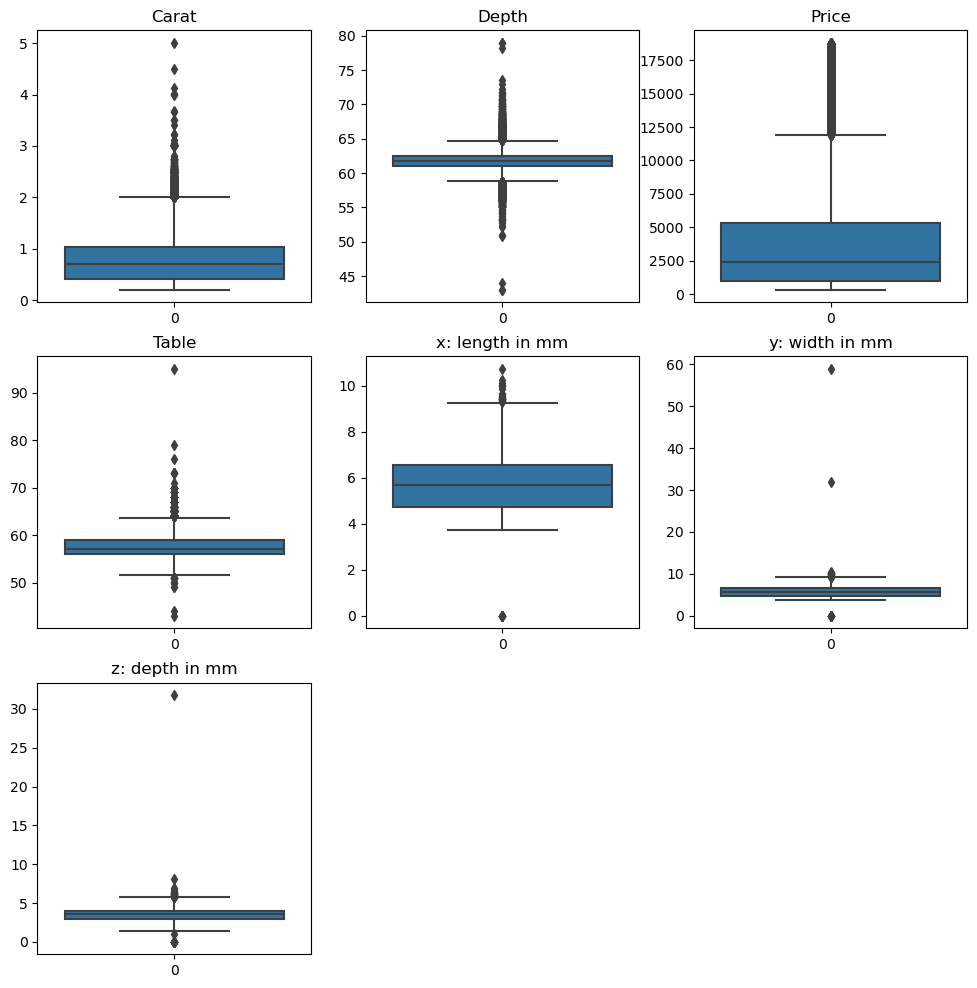

In [7]:
plt.figure(figsize=(12,12))

plt.subplot(3, 3, 1)
sns.boxplot(data['carat'])
plt.title('Carat')

plt.subplot(3, 3, 2)
sns.boxplot(data['depth'])
plt.title('Depth')

plt.subplot(3, 3, 3)
sns.boxplot(data['price'])
plt.title('Price')

plt.subplot(3, 3, 4)
sns.boxplot(data['table'])
plt.title('Table')

plt.subplot(3, 3, 5)
sns.boxplot(data['x'])
plt.title('x: length in mm')

plt.subplot(3, 3, 6)
sns.boxplot(data['y'])
plt.title('y: width in mm')

plt.subplot(3, 3, 7)
sns.boxplot(data['z'])
plt.title('z: depth in mm')

* As one can clearly observe there are outliers in every numeric variable, but dealing with outliers is not neede here because of its domain since some exceptional diamonds can have higher carat, more depth high price etc.

* So the above plot is just to check there are outliers or not.

### Univariate Analysis

Text(0.5, 0, 'Clarity')

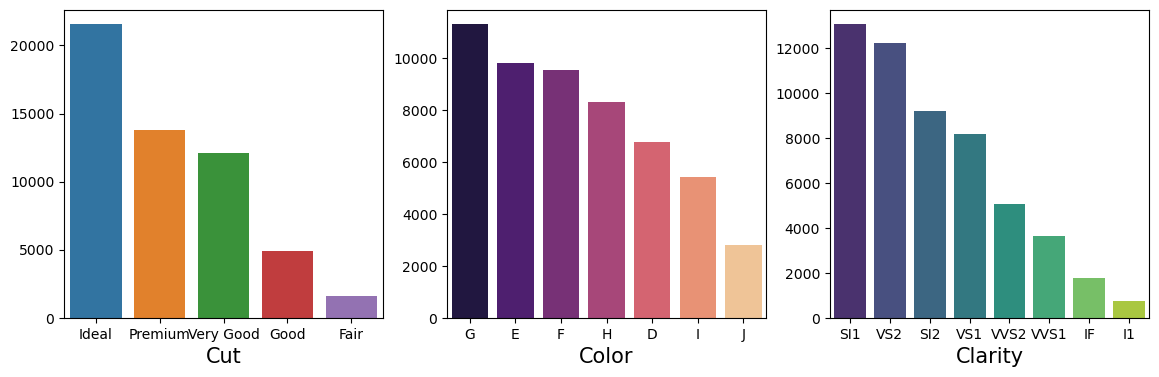

In [8]:
#checking catrgorical variables

plt.figure(figsize=(14,4))

plt.subplot(1,3,1)
sns.barplot(y=data['cut'].value_counts().values, x=data['cut'].value_counts().index)
plt.xlabel('Cut', fontsize=15)

plt.subplot(1,3,2)
sns.barplot(y=data['color'].value_counts().values, x=data['color'].value_counts().index,palette='magma')
plt.xlabel('Color', fontsize=15)

plt.subplot(1,3,3)
sns.barplot(y=data['clarity'].value_counts().values, x=data['clarity'].value_counts().index,palette='viridis')
plt.xlabel('Clarity', fontsize=15)

* One imp insight from the above plots is that no of different categories are less than 10 in all 3 variables so **one-hot encoding** can be performed directly to make these ready for ML models.

### Bivariate and Multi-Variate Analysis

*  checking if there is any statistically significant relationship between categorical variables and dependent variable using kruskal and annova tests.

 F_onewayResult(statistic=290.2541415582281, pvalue=0.0) 
 KruskalResult(statistic=1335.4960058136464, pvalue=2.239871001808548e-285)
 There is significant relationship between color and price.


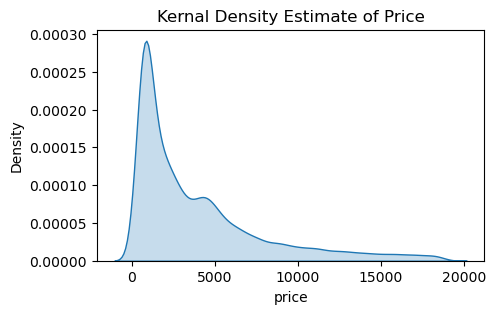

In [9]:
import scipy.stats as stats

annova = stats.f_oneway(data['price'][data['color']=='D'],
                        data['price'][data['color']=='E'],
                        data['price'][data['color']=='F'],
                        data['price'][data['color']=='G'],
                        data['price'][data['color']=='H'],
                        data['price'][data['color']=='I'],
                        data['price'][data['color']=='J'])


kruskal = stats.kruskal(data['price'][data['color']=='D'],
                        data['price'][data['color']=='E'],
                        data['price'][data['color']=='F'],
                        data['price'][data['color']=='G'],
                        data['price'][data['color']=='H'],
                        data['price'][data['color']=='I'],
                        data['price'][data['color']=='J'])

print("",annova,'\n', kruskal)

plt.figure(figsize=(5,3))
sns.kdeplot(data['price'],fill=True)
plt.title('Kernal Density Estimate of Price')

if kruskal.pvalue < 0.05:
    print(" There is significant relationship between color and price.")
else:
    print(" There is significant relationship between color and price.")

* As the P-value of krukal test is less than 0.05 (alpha value) , suggests that **there is significant relationship between price and color**.
* **Note:**: Annova test gave the p-value as 0 because the price distribution is **not gaussian** as one can see in the above KDE plot. So used krusal which can perform better for non-normal distibutions too, i,e presence of outliers.

In [10]:
data['clarity'].value_counts()

clarity
SI1     13067
VS2     12259
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64

In [11]:
annova = stats.f_oneway(data['price'][data['clarity']=='SI1'],data['price'][data['clarity']=='VS2'],
                      data['price'][data['clarity']=='SI2'],data['price'][data['clarity']=='VS1'],
                      data['price'][data['clarity']=='VVS2'],data['price'][data['clarity']=='VVS1'],
                      data['price'][data['clarity']=='IF'],data['price'][data['clarity']=='I1'])

kruskal = stats.kruskal(data['price'][data['clarity']=='SI1'],data['price'][data['clarity']=='VS2'],
                      data['price'][data['clarity']=='SI2'],data['price'][data['clarity']=='VS1'],
                      data['price'][data['clarity']=='VVS2'],data['price'][data['clarity']=='VVS1'],
                      data['price'][data['clarity']=='IF'],data['price'][data['clarity']=='I1'])

print("",annova,'\n', kruskal)

if kruskal.pvalue and annova.pvalue < 0.05:
    print(" There is significant relationship between color and price.")
else:
    print(" There is significant relationship between color and price.")

 F_onewayResult(statistic=215.02743188904623, pvalue=1.86555794e-316) 
 KruskalResult(statistic=2718.52354003717, pvalue=0.0)
 There is significant relationship between color and price.


* Again the P-value is less then alpha values so **there is significant relationship between clarity and price**.

In [12]:
data['cut'].value_counts()

cut
Ideal        21551
Premium      13793
Very Good    12083
Good          4906
Fair          1610
Name: count, dtype: int64

In [13]:
annova = stats.f_oneway(data['price'][data['cut']=='Ideal'],data['price'][data['cut']=='Premium'],
                        data['price'][data['cut']=='Very Good'],data['price'][data['cut']=='Good'],
                        data['price'][data['cut']=='Fair'])

kruskal = stats.kruskal(data['price'][data['cut']=='Ideal'],data['price'][data['cut']=='Premium'],
                        data['price'][data['cut']=='Very Good'],data['price'][data['cut']=='Good'],
                        data['price'][data['cut']=='Fair'])

print("",annova,'\n', kruskal)

if kruskal.pvalue and annova.pvalue < 0.05:
    print(" There is significant relationship between color and price.")
else:
    print(" There is significant relationship between color and price.")

 F_onewayResult(statistic=175.63263533586198, pvalue=9.410997495179044e-150) 
 KruskalResult(statistic=978.7477690503208, pvalue=1.4392946013274235e-210)
 There is significant relationship between color and price.


* The P-value is less than the aplha value so **there is a significant relationship between cut and price.**

In [14]:
# checking correaltion for continious variables

correlation = data.corr(method='pearson',numeric_only=True)
correlation

,carat,depth,table,price,x,y,z
carat,1.000000,0.028234,0.181602,0.921591,0.975093,0.951721,0.953387
depth,0.028234,1.000000,-0.295798,-0.010630,-0.025289,-0.029340,0.094927
table,0.181602,-0.295798,1.000000,0.127118,0.195333,0.183750,0.150915
price,0.921591,-0.010630,0.127118,1.000000,0.884433,0.865419,0.861249
x,0.975093,-0.025289,0.195333,0.884433,1.000000,0.974701,0.970771
y,0.951721,-0.029340,0.183750,0.865419,0.974701,1.000000,0.952005
z,0.953387,0.094927,0.150915,0.861249,0.970771,0.952005,1.000000


<Axes: >

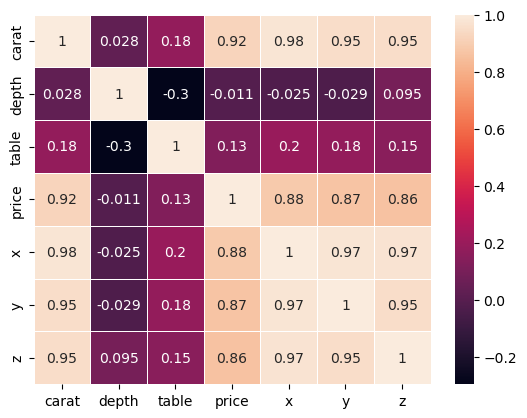

In [15]:
# creating a heat map using seaborn library

sns.heatmap(correlation,annot=True,linewidths=.5)

* As one can observe that **carat and price** are highly correlated.
* **length, width and depth** also have good correlation with price.
* whereas **depth** is negatively correlated, and **table** has less correaltion with price.

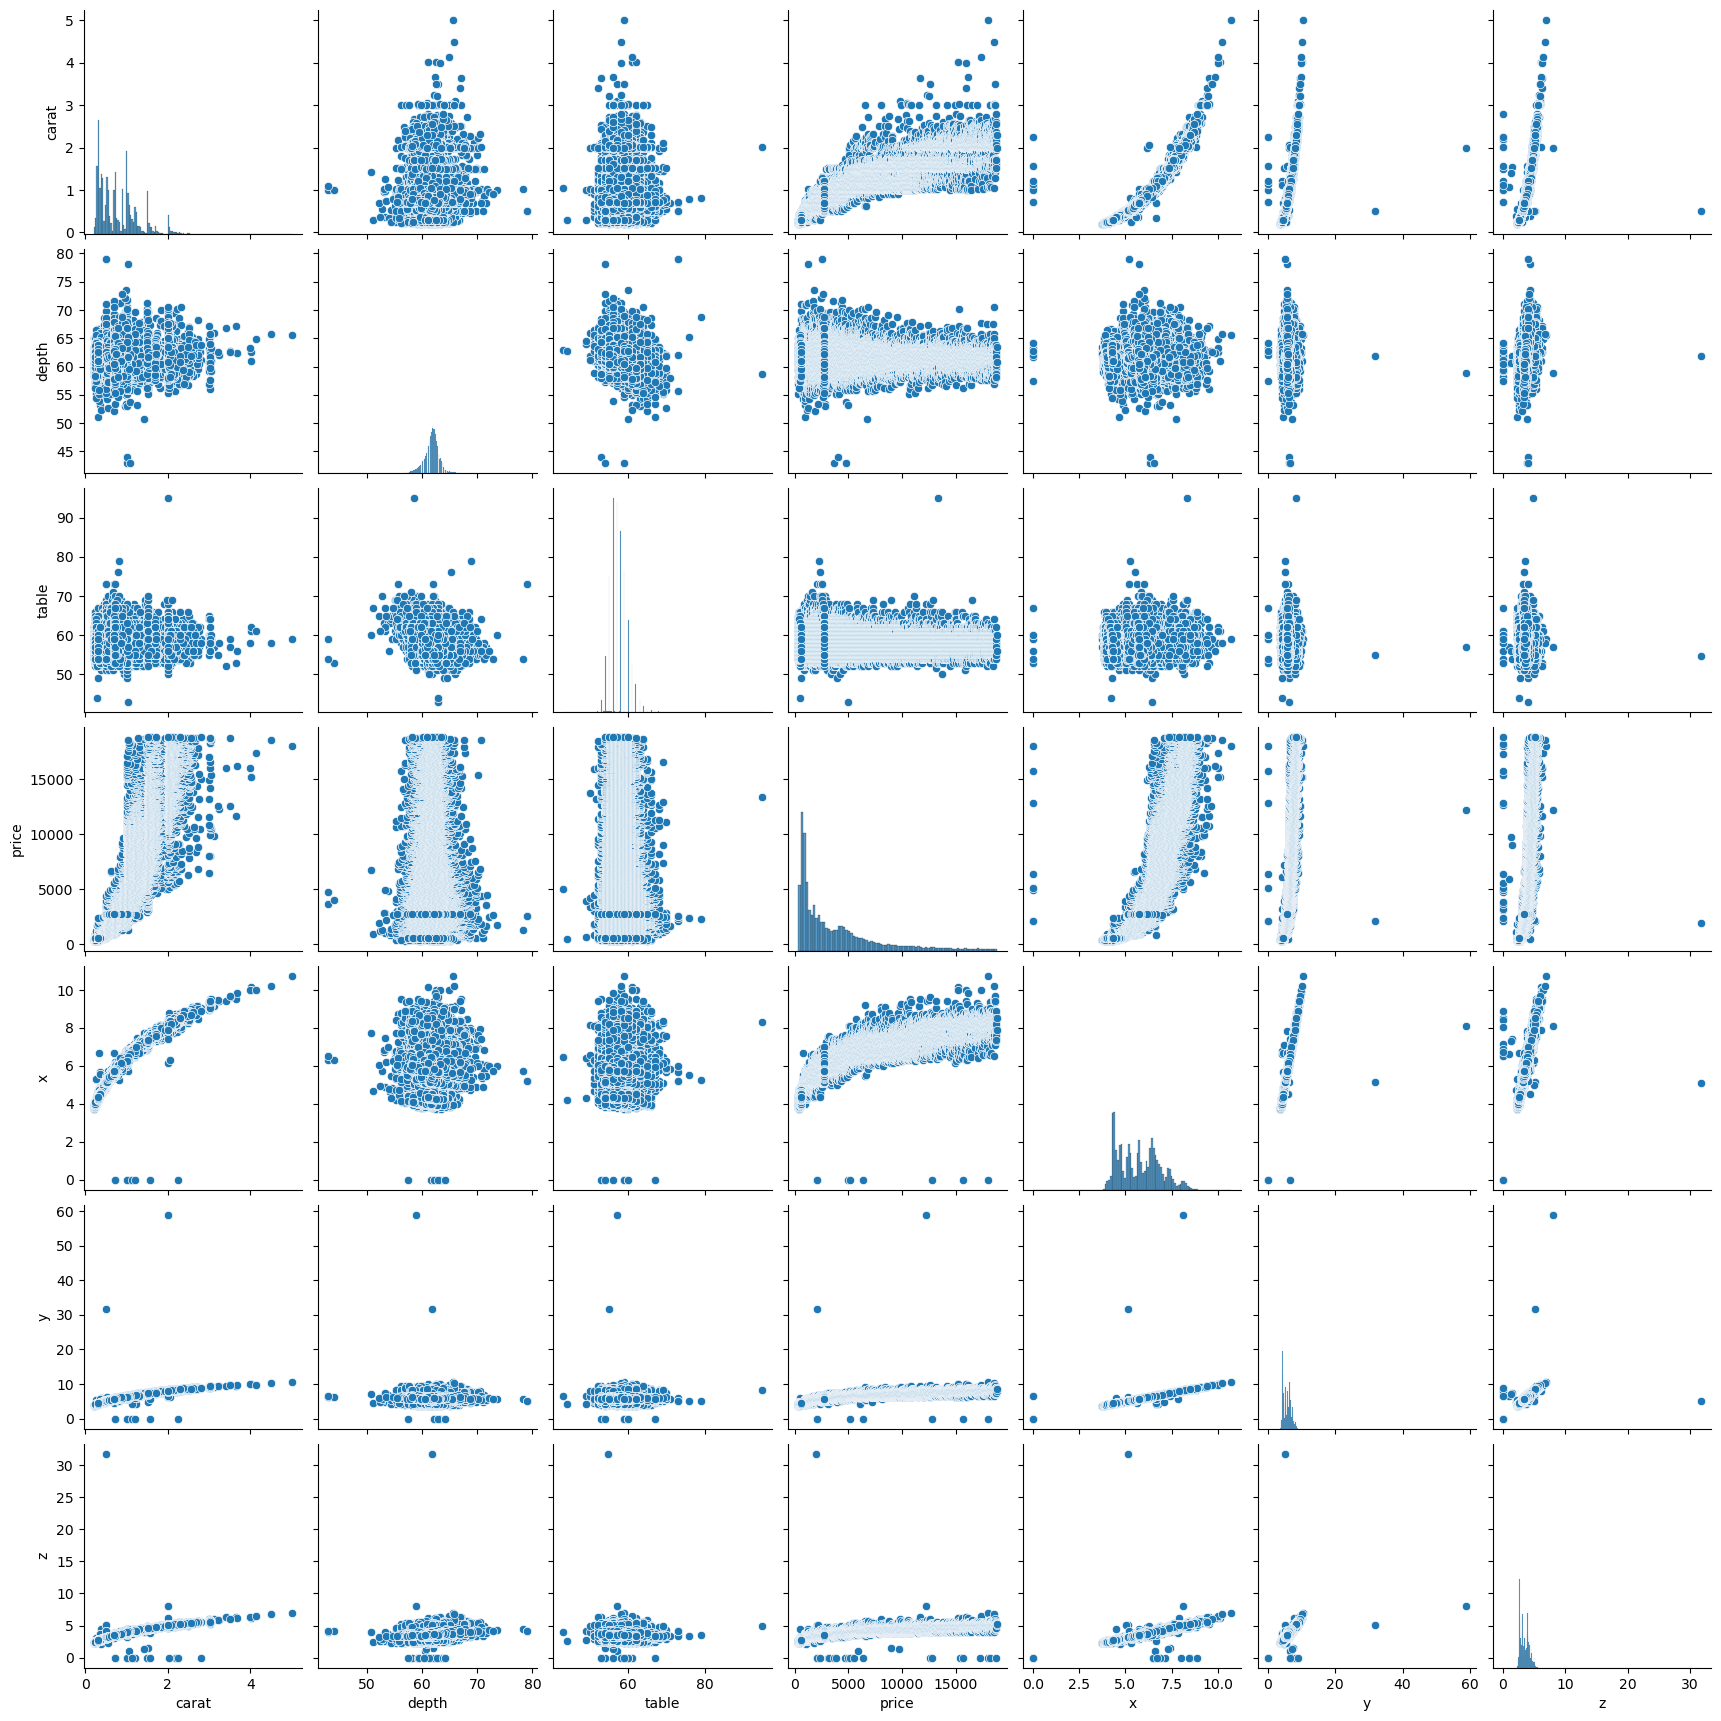

In [16]:
# lets create a pair plot

sns.pairplot(data)

* No real insights from this plot as this dataset have and a lot of outliers and not not normally distibuted.

## Feature Engineering

* Since all the variables have signicant relationship with the price so keeping all the continuous variables as they are and performing **one-hot encoding** on all categorical variables as their individual categories are also not more than 10, so the dataset will not be computationally expensive.

In [17]:
# one-hot encoding

cleaned_data = pd.get_dummies(data, dtype=int)
cleaned_data.head()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0


* Now all the variables are in the dataset are in numeric format for the Ml preditive model to perform well on it.

## Implementing predictive model (Linear Regression)

In [18]:
# seperating dependent and independent variables

x = cleaned_data.drop(columns=['price'],axis=1)
y = cleaned_data['price']

x.shape, y.shape

((53943, 26), (53943,))

In [19]:
# splitting the dataset into train and test 

from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y = train_test_split(x,y,random_state=42)

train_x.shape, test_x.shape, train_y.shape, test_y.shape

((40457, 26), (13486, 26), (40457,), (13486,))

In [20]:
# implementing Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae

LR = LinearRegression()

LR.fit(train_x,train_y)

train_predict = LR.predict(train_x)

k = mae(train_predict, train_y)
print("Training Mean absolute error: ", k)

Training Mean absolute error:  747.8278326371209


In [21]:
LR.fit(train_x,train_y)

test_predict = LR.predict(test_x)

k = mae(test_predict, test_y)
print("Test Mean absolute error: ", k)

Test Mean absolute error:  730.3823965593949


* There is not a lot difference between training and test mean absolute error.

In [22]:
LR.coef_

array([ 1.11823189e+04, -5.90545567e+01, -2.58378823e+01, -9.16543337e+02,
        7.59134320e+00, -1.48139820e+02,  2.05967288e+14,  2.05967288e+14,
        2.05967288e+14,  2.05967288e+14,  2.05967288e+14, -1.58325688e+14,
       -1.58325688e+14, -1.58325688e+14, -1.58325688e+14, -1.58325688e+14,
       -1.58325688e+14, -1.58325688e+14, -3.62309497e+14, -3.62309497e+14,
       -3.62309497e+14, -3.62309497e+14, -3.62309497e+14, -3.62309497e+14,
       -3.62309497e+14, -3.62309497e+14])

Text(0.5, 1.0, 'Coefficient Plot')

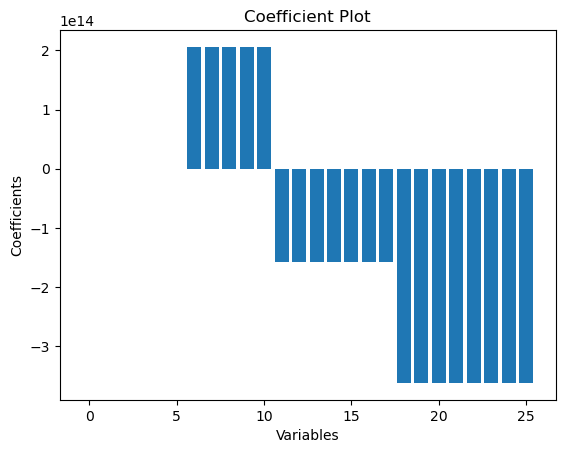

In [23]:
# Plotting the coefficients

x = range(len(train_x.columns))
y = LR.coef_
plt.bar(x,y)
plt.xlabel('Variables')
plt.ylabel('Coefficients')
plt.title('Coefficient Plot')

* Model depends on some independent varibles too much, but these coefficients are not suitable for interpretation becasue these are not scaled.

## Checking assumptions of Linear Regression

In [24]:
# Arranging and calculating the residuals

residuals = pd.DataFrame({'fitted_values':test_y,
                           'predicted_values':test_predict})

residuals['residuals'] = residuals['fitted_values'] - residuals['predicted_values']

residuals.head()

,fitted_values,predicted_values,residuals
1388,559,702.1250,-143.1250
19841,8403,8106.6875,296.3125
41647,1238,314.3750,923.6250
41741,1243,661.1875,581.8125
17244,6901,9862.0000,-2961.0000


In [25]:
residuals.shape

(13486, 3)

### Plotting residual curve (Is there constant variance or Homoscedastic?)

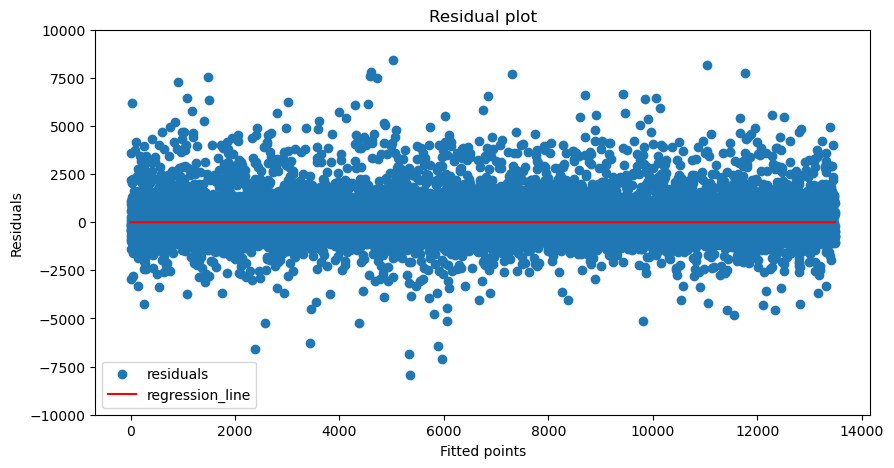

In [26]:
plt.figure(figsize=(10,5),facecolor='w',edgecolor='b')
f = range(0,13486)
k = [0 for i in range(0,13486)]
plt.scatter(x=f,y=residuals['residuals'],label='residuals')
plt.plot(f,k,color='red',label='regression_line')
plt.xlabel('Fitted points')
plt.ylabel('Residuals')
plt.title('Residual plot')
plt.ylim(-10000,10000)
plt.legend()

* The residuals does not have correlation and plot looks **Homoscedastic**i,e the variance of the errors across the dataset are nearly constant.

### Checking distribution of residuals

(-5000.0, 5000.0)

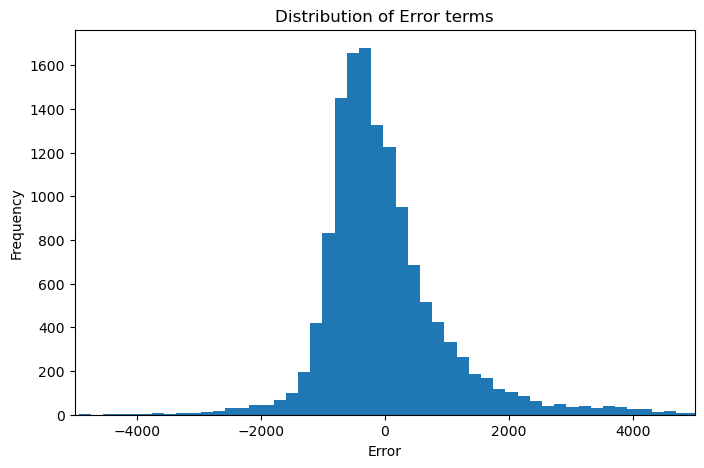

In [27]:
# Histogram for residuals
plt.figure(figsize=(8,5))
plt.hist(residuals['residuals'],bins=150)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Distribution of Error terms')
plt.xlim(-5000,5000)

* Distribution is nearly normal, but with few huge outliers.

### QQ-Plot (Is the data normally distributed?)

In [29]:
import statsmodels.api as sm

(-5.0, 5.0)

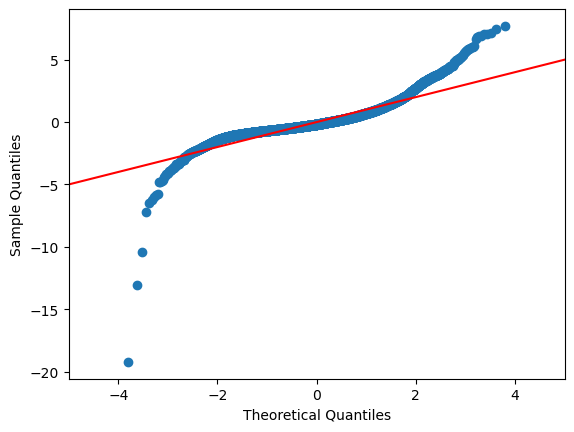

In [33]:
sm.qqplot(residuals['residuals'],line='45',fit=True)
plt.xlim(-5,5)

* The data have some outliers in both extreme ends so not really resembling normal distribution.

### Variance Inflation Factor(VIF) (Checking for multicollinearity)

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

#calculating VIF for every column(only works for non-categorical variables)
VIF = pd.Series([variance_inflation_factor(cleaned_data.values, i) for i in range(cleaned_data.shape[1])], 
                index=cleaned_data.columns)
VIF

carat            44.743308
depth             1.788992
table             1.790415
price            12.467419
x                58.520114
y                20.592244
z                23.586575
cut_Fair               inf
cut_Good               inf
cut_Ideal              inf
cut_Premium            inf
cut_Very Good          inf
color_D                inf
color_E                inf
color_F                inf
color_G                inf
color_H                inf
color_I                inf
color_J                inf
clarity_I1             inf
clarity_IF             inf
clarity_SI1            inf
clarity_SI2            inf
clarity_VS1            inf
clarity_VS2            inf
clarity_VVS1           inf
clarity_VVS2           inf
dtype: float64

* Its clearly evident that there are 5 independent variables over the value of **5, which means that there are features that exhibit multicollinearity** in the dataset.

### Normalizing the data.

* Till now we have been implementing model on non-normalized data lets normalize the data and then check the mean absolute error, if there is any improvement or not.

In [43]:
x = cleaned_data.drop(columns=['price'],axis=1)
y = cleaned_data['price']

x.shape, y.shape

((53943, 26), (53943,))

In [45]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

x = pd.DataFrame(x_scaled, columns=x.columns)
x.head()

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.006237,0.513889,0.230769,0.367784,0.067572,0.076415,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.002079,0.466667,0.346154,0.362197,0.065195,0.072642,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.006237,0.386111,0.423077,0.377095,0.069100,0.072642,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.018711,0.538889,0.288462,0.391061,0.071817,0.082704,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.022869,0.563889,0.288462,0.404097,0.073854,0.086478,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [46]:
# splitting the dataset into train and test
train_xn,test_xn,train_yn,test_yn = train_test_split(x,y,random_state=42)

train_xn.shape,test_xn.shape,train_yn.shape,test_yn.shape

((40457, 26), (13486, 26), (40457,), (13486,))

* Scaled the data using MinMaxScaler which scales the data from o to 1.

###  Fitting the model on scaled data.

In [48]:
lr = LinearRegression()

lr.fit(train_xn,train_yn)

train_predict_norm = lr.predict(train_xn)

n = mae(train_predict_norm,train_yn)
print("Training Mean absolute error for normalized data:",n)

Training Mean absolute error for normalized data: 747.8518179795833


In [49]:
lr.fit(train_xn,train_yn)

test_predict_norm = lr.predict(test_xn)

n = mae(test_predict_norm,test_yn)
print("Test Mean absolute error for normalized data:",n)

Test Mean absolute error for normalized data: 730.3836942013941


### Conclusion:
* Linear regression gave good enough Mean absolute error results.
* But if you compare the Mean absolute errors values of normalized and non-nomalized data, there is very little to no difference, so the problem is not about scaling but the model selection itself most of the **Linear Regression assumptions are not satisfied for the residual data**.
* So have to select other regression models for better results.